<a href="https://colab.research.google.com/github/bs18b019/Data-science-work/blob/main/Nural_network_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project I will create a neural network model from scratch for binery classification amd will also visualise the result how inceasing hidden layer increase accuracy for training data but reduces accuracy for real data( we alos know is as overfitting) 

Importing necessary library

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import sklearn 
import sklearn.datasets 
import sklearn.linear_model 
import matplotlib

#Generating a dataset

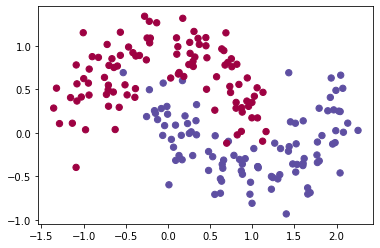

In [11]:
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)
plt.show()

In [4]:
type(X),type(y)
X.shape, y.shape

((200, 2), (200,))

# Lets first try logistic regression model

Define a function for plotting the figure

In [14]:
def plot_decision_boundary(pred_func): 
    # Set min and max values and give it some padding 
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5 
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5 
    h = 0.01 
    # Generate a grid of points with distance h between them 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 
    # Predict the function value for the whole gid 
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()]) 
    Z = Z.reshape(xx.shape) 
    # Plot the contour and training examples 
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral) 
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral) 



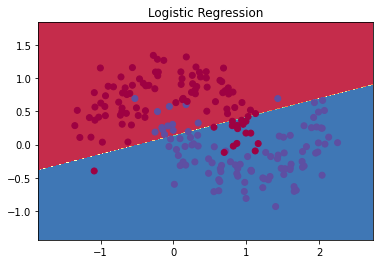

In [15]:
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X, y)
 
# Plot the decision boundary
plot_decision_boundary(lambda x: clf.predict(x))
plt.title('Logistic Regression')
plt.show()

As we Can see in previous figure that it tryied to fit best line but it could not capture all the data in specified class, that is why we need to train nural net 

#lets develope neural network model

In [16]:
# we need to defirn some parameter

num_examples = len(X) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality
 
# Gradient descent parameters (I chossed these value by myself understanding it can varies also)
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

#Implementing Loss function 

In [17]:
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    #Normalising the value, to do that we need divide every value by some of every value
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    # Add regulatization term to loss (optional)
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

# Defining helper function which predict the output

In [23]:
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

# Here we define a function to train the model

In [21]:
# - nn_hdim: Number of nodes in the hidden layer
# - num_passes: Number of passes through the training data for gradient descent
# - print_loss: If True, print the loss every 1000 iterations

def build_model(nn_hdim, num_passes=20000, print_loss=False):
    
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))
 
    # This is what we return at the end
    model = {}
    
    # Gradient descent. For each batch...
    for i in range(0, num_passes):
 
        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
 
        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)
 
        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1
 
        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 1000 == 0:
          print ('Loss after iteration %i: %f&quot; %',(i, calculate_loss(model)))
    
    return model

# Now lets develope a hidden layer of size 3

Loss after iteration %i: %f&quot; % (0, 0.43238663152549245)
Loss after iteration %i: %f&quot; % (1000, 0.06894653811984068)
Loss after iteration %i: %f&quot; % (2000, 0.06888834576372631)
Loss after iteration %i: %f&quot; % (3000, 0.0707519888629902)
Loss after iteration %i: %f&quot; % (4000, 0.07074835521865029)
Loss after iteration %i: %f&quot; % (5000, 0.07075121092757773)
Loss after iteration %i: %f&quot; % (6000, 0.0707540736415318)
Loss after iteration %i: %f&quot; % (7000, 0.07075605817523488)
Loss after iteration %i: %f&quot; % (8000, 0.07075727427399266)
Loss after iteration %i: %f&quot; % (9000, 0.07075795708742298)
Loss after iteration %i: %f&quot; % (10000, 0.07075830057046377)
Loss after iteration %i: %f&quot; % (11000, 0.0707584396165003)
Loss after iteration %i: %f&quot; % (12000, 0.0707584618116745)
Loss after iteration %i: %f&quot; % (13000, 0.07075842173093007)
Loss after iteration %i: %f&quot; % (14000, 0.0707583522353654)
Loss after iteration %i: %f&quot; % (15000,

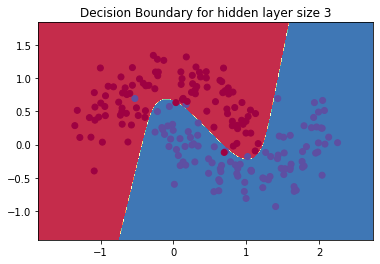

In [24]:
model = build_model(3, print_loss=True)
 
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title('Decision Boundary for hidden layer size 3')
plt.show()

seems pretty good, we just somewhat made it

#Now lets vary hidden layer size and check how does it actually look on graph

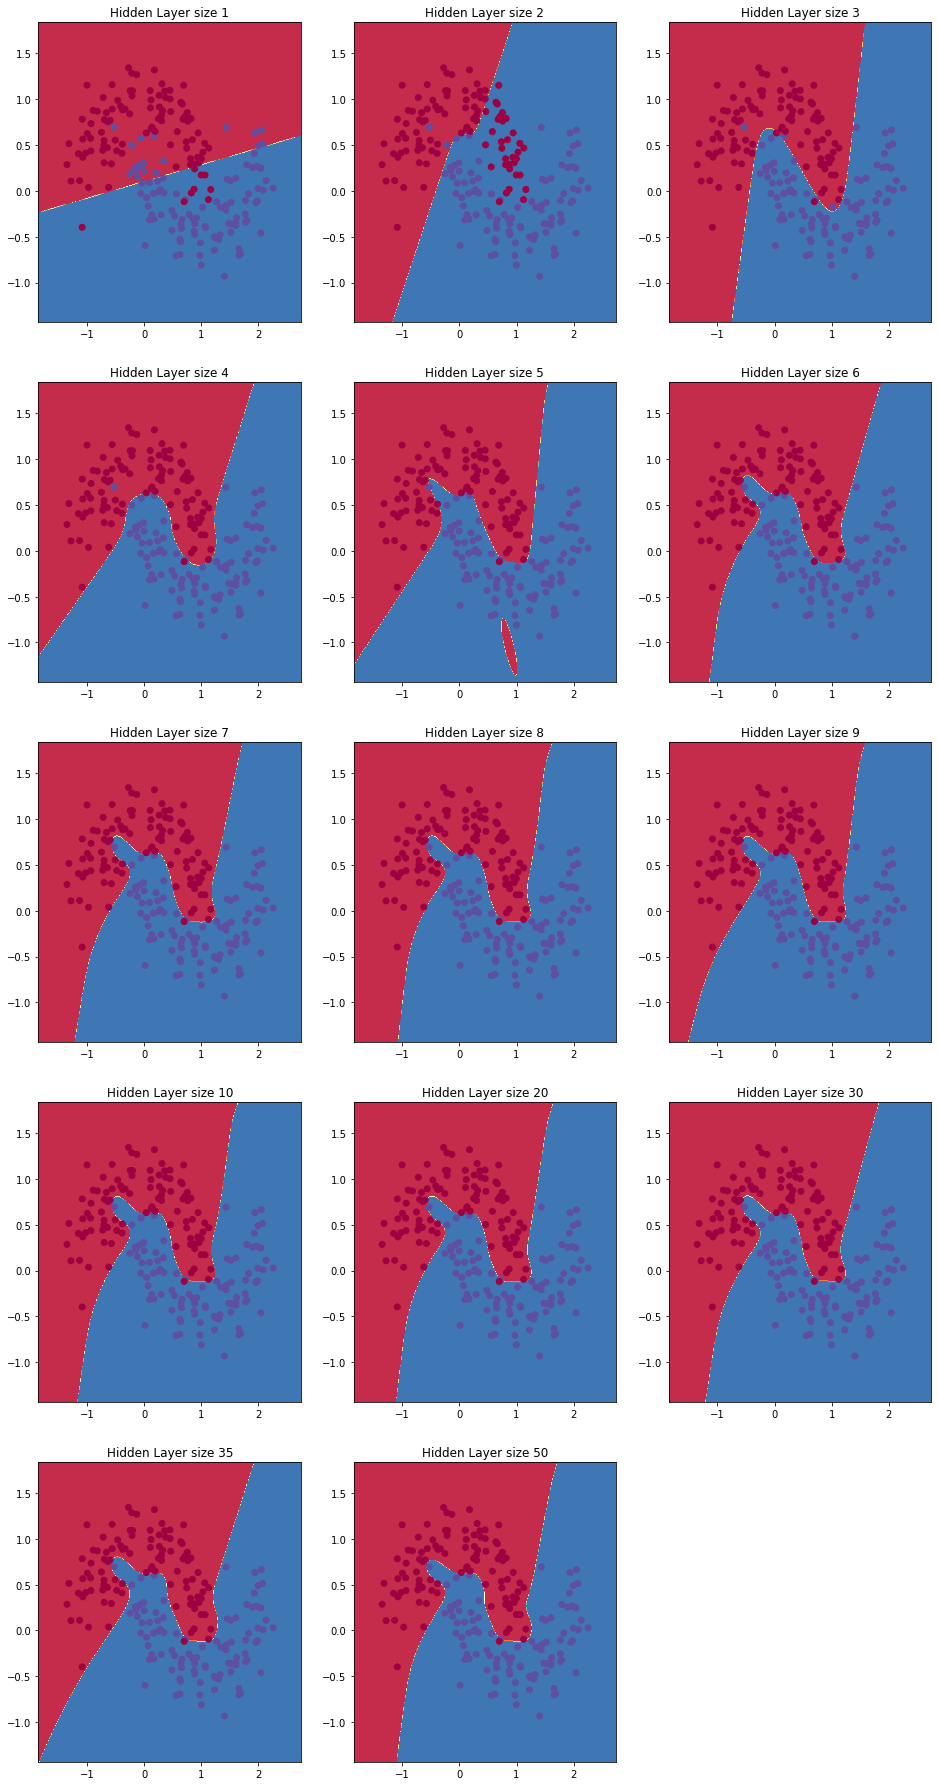

In [25]:
plt.figure(figsize=(16, 32))
hidden_layer_dimensions = [1, 2, 3, 4, 5,6,7,8,9,10, 20, 30,35, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 3, i+1)
    plt.title('Hidden Layer size %d' % nn_hdim)
    model = build_model(nn_hdim)
    plot_decision_boundary(lambda x: predict(model, x))
plt.show()

As we can in this plot how increasing number of hidden layer increase accuracy for training data but not for real data 


Referance-  http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/
